In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 341s 2us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [23]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

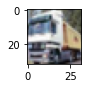

In [24]:
plot_sample(1)

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
x_train_s = x_train/255
x_test_s = x_test/255

In [29]:
x_train_s[2]

array([[[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.44313725, 0.47058824, 0.43921569],
        [0.43529412, 0.4627451 , 0.43529412],
        [0.41176471, 0

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [37]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape = (32, 32, 3)),
     keras.layers.Dense(3000, activation = 'relu'),
     keras.layers.Dense(3000, activation = 'relu'),
     keras.layers.Dense(10, activation = 'sigmoid')
    
])
model.compile(optimizer='SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train_s, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 157s 99ms/step - loss: 1.8031 - accuracy: 0.3584s - loss: 1.8030 - accuracy: 
Epoch 2/50
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6169 - accuracy: 0.4315
Epoch 3/50
1563/1563 [==============================] - 151s 97ms/step - loss: 1.5337 - accuracy: 0.4602
Epoch 4/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4736 - accuracy: 0.4793s - loss: 1.4
Epoch 5/50
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4244 - accuracy: 0.4985
Epoch 6/50
1563/1563 [==============================] - 148s 95ms/step - loss: 1.3809 - accuracy: 0.5168
Epoch 7/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3413 - accuracy: 0.5277s - loss: 1.3399 - accura
Epoch 8/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3065 - accuracy: 0.5396
Epoch 9/50
1563/1563 [==============================] - 141s 90ms/step - loss: 1.2751 - accur

In [51]:
classes[np.argmax(model.predict(x_test_s)[1])]

'ship'

In [46]:
classes[y_test[1][0]]

'ship'

In [52]:
def plot_sample1(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_test_s[index])

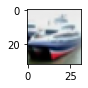

In [53]:
plot_sample1(1)